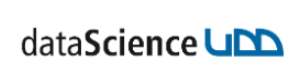

# Tarea n°2: Deep Learning

Profesor: Takeshi Eduardo Asahi Kodama

Alumno: Alejandro Andrés Méndez Miranda



El dataset seleccionado es 60k stack overflow questions with quality rate. Es un problema de clasificación de calidad del posteo en la página de StackOverflow. Para esta tarea se entrega tanto el título, el cuerpo y los tags del post, además de la fecha, ID y las 3 categorías a predecir:

* LQ_CLOSE: Baja calidad cerrado
* LQ_EDIT: Baja calidad editado
* HQ: Alta calidad


El enlace de kaggle al dataset es el siguiente:[link al dataset](https://www.kaggle.com/imoore/60k-stack-overflow-questions-with-quality-rate)

A continuación realizaremos la lectura y descripción del dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Cargar los datos del set (conjunto) seleccionado. 

In [2]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

In [3]:
train

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,<android><material-design><floating-action-but...,2016-01-01 05:21:48,HQ
...,...,...,...,...,...,...
44995,60461435,Convert List<String> to string C# - asp.net - ...,<p>I am new to this and I am asking for help t...,<c#><asp.net><sql-server>,2020-02-29 02:22:18,LQ_CLOSE
44996,60461754,Does Python execute code from the top or botto...,<p>I am working on learning Python and was won...,<python>,2020-02-29 03:33:59,LQ_CLOSE
44997,60462001,how to change payment date in Azure?,<p>It looks like it costs 8 days per month in ...,<azure><billing>,2020-02-29 04:34:16,LQ_CLOSE
44998,60465318,how to implement fill in the blank in Swift,"<p>""I _____ any questions.""</p>\n\n<p>I want t...",<ios><swift>,2020-02-29 12:50:43,LQ_CLOSE


In [4]:
valid

,Id,Title,Body,Tags,CreationDate,Y
0,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
1,34554721,Retrieve all except some data of the another t...,I have two table m_master and tbl_appointment\...,<php><mysql><sql><codeigniter><mysqli>,2016-01-01 08:43:50,LQ_EDIT
2,34555135,Pandas: read_html,<p>I'm trying to extract US states from wiki U...,<python><pandas>,2016-01-01 09:55:22,HQ
3,34555448,Reader Always gimme NULL,"I'm so new to C#, I wanna make an application ...",<sql-server><c#-4.0>,2016-01-01 10:43:45,LQ_EDIT
4,34555752,php rearrange array elements based on condition,basically i have this array:\r\n\r\n array(...,<php>,2016-01-01 11:34:09,LQ_EDIT
...,...,...,...,...,...,...
14995,60465681,How can I align two flex boxes to follow each ...,"<p>I have a menu, and I'd like the div.right-c...",<html><css><flexbox>,2020-02-29 13:32:56,LQ_CLOSE
14996,60467932,C++ The correct way to multiply an integer and...,<p>I try to multiply an integer by a double bu...,<c++>,2020-02-29 17:46:41,LQ_CLOSE
14997,60468378,WHY DJANGO IS SHOWING ME THIS ERROR WHEN I TRY...,*URLS.PY*\r\n //URLS.PY FILE\r\n fro...,<django><django-views><django-templates>,2020-02-29 18:35:39,LQ_EDIT
14998,60469392,PHP - getting the content of php page,<p>I have a controller inside which a server i...,<javascript><php><html>,2020-02-29 20:32:14,LQ_CLOSE


# 2) Hacer una breve descripción de estos datos (estadísticas, histogramas, etc.).
# 3) Hacer curación de datos (eliminación de comas y otros caracteres especiales en el caso de texto, recorte 

El dataset  consta de 45000 filas para el set de entrenamiento y 15000 de validación. Tienen 6 columnas comunes:

* Id: Contiene el id del post
* Title: El título con el que se creó el post
* Body: Incluye el texto dentro del cuerpo del post
* Tags: Etiquetas dado al post
* CreationDate: Fecha de creación del post
* Y: Clasificación del post, son 3 categorías: LQ_CLOSE, LQ_EDIT y HQ

In [5]:
a = train["Y"]
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{'HQ': 15000, 'LQ_CLOSE': 15000, 'LQ_EDIT': 15000}

Para cada categoría observamos 15000 datos, es un set balanceado. Otro análisis que se puede realizar es analizar la importancia de lenguajes o tarea según se indica en la columna tag, pero para ello se necesita un pequeño procesado.

In [6]:
train["Tags"] = train['Tags'].str.replace('<','')
train["Tags"] = train['Tags'].str.replace('>',' ')

In [7]:
train.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,java repeat,2016-01-01 00:21:59,LQ_CLOSE
1,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,java optional,2016-01-01 02:03:20,HQ
2,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ
3,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ
4,34553755,hide/show fab with scale animation,<p>I'm using custom floatingactionmenu. I need...,android material-design floating-action-button,2016-01-01 05:21:48,HQ


In [8]:
flat_list = []
for sublist in np.array(train["Tags"]):
    flat_list.append(sublist.split()[0])

In [9]:
count_list_tag = flat_list
unique, counts = np.unique(count_list_tag, return_counts=True)
tag_df = pd.DataFrame({"tag": unique, "count":counts})
tag_df.sort_values("count", inplace = True, ascending = False )
tag_df = tag_df.iloc[:10,:]
tag_df

,tag,count
622,javascript,5385
950,python,4962
617,java,4641
195,c#,3084
894,php,2759
47,android,2592
198,c++,2204
594,ios,1255
194,c,1234
547,html,888


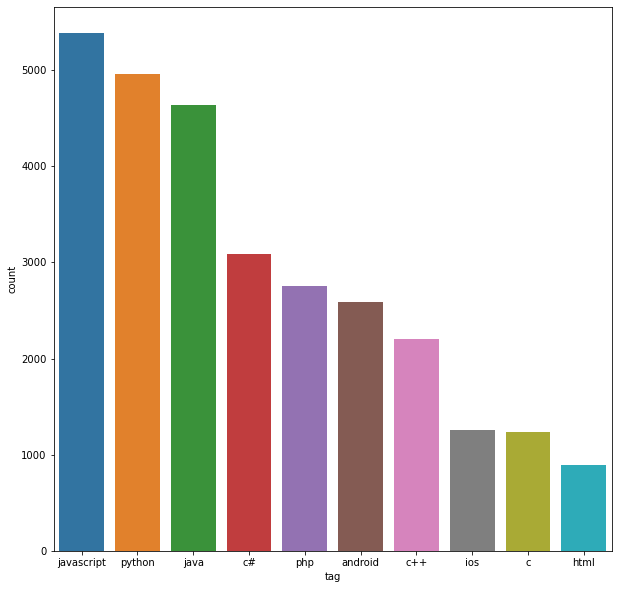

In [10]:
plt.figure(figsize = (10,10))
sns.barplot(x = "tag", y = "count", data = tag_df)
plt.show()

En este dataset el lenguaje más presente es el javascript, python y java. Antes de continuar con otros análisis se hace necesario realizar la limpieza de los datos, que se realizará a continuación.

In [11]:
#Se importa nltk para realizar la limpieza. Para ello se crea una función que luego será aplicada al dataframe
import re
import nltk
from nltk.corpus import stopwords

def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

In [12]:
#La limpieza se realiza aplicando distintas funciones de reemplazo (En general símbolos a string vacíos).
#Al finalizar se aplica la limpieza de stopwords

for column in ['Body', 'Title']:

    train[column] = train[column].map(lambda x: re.sub('\\n',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\W',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'\s+',' ',str(x)))
    train[column] = train[column].str.lower()

    train[column] = train[column].map(lambda x: re.sub(r"\’", "\'", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"dont", "do not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"n\’t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"n\'t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'re", " are", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'s", " is", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\’d", " would", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\d", " would", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'ll", " will", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'t", " not", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'ve", " have", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'m", " am", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\n", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\r", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\'", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r"\"", "", str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
    train[column] = train[column].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
    train[column] = train[column].apply(lambda x: remove_stopwords(x))



In [13]:
#Se une en un solo string el título y el cuerpo del post que se utilizará además para realizar las predicciones

train['description'] = train['Title'] + " " + train['Body']
train.head()

,Id,Title,Body,Tags,CreationDate,Y,description
0,34552656,java repeat task every random seconds,already familiar repeating tasks every seconds...,java repeat,2016-01-01 00:21:59,LQ_CLOSE,java repeat task every random seconds already ...
1,34553034,are java optionals immutable,like understand java would optionals designed ...,java optional,2016-01-01 02:03:20,HQ,are java optionals immutable like understand j...
2,34553174,text overlay image darkened opacity react native,am attempting overlay title an image image dar...,javascript image overlay react-native opacity,2016-01-01 02:48:24,HQ,text overlay image darkened opacity react nati...
3,34553318,ternary operator swift so picky,question very simple just could find answer p ...,swift operators whitespace ternary-operator op...,2016-01-01 03:30:17,HQ,ternary operator swift so picky question very ...
4,34553755,hide show fab scale animation,using custom floatingactionmenu need implement...,android material-design floating-action-button,2016-01-01 05:21:48,HQ,hide show fab scale animation using custom flo...


# Palabras más frecuentes según las distintas categorías

In [14]:
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

### Categoría LQ_CLOSE

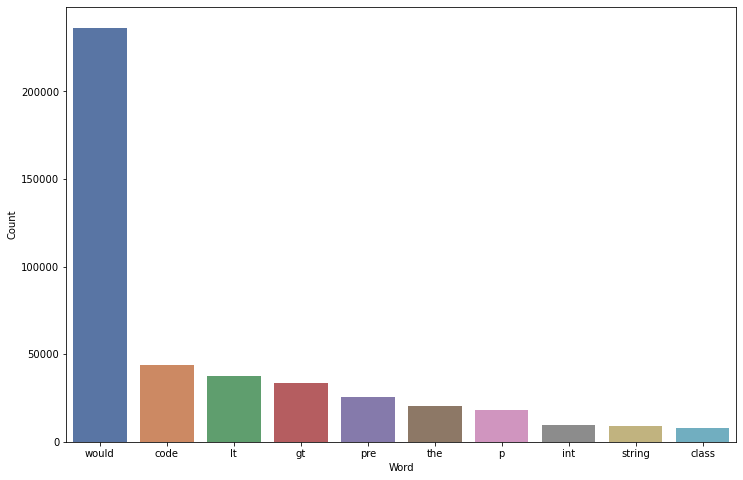

In [15]:
counter(train[train['Y'] == "LQ_CLOSE"], 'description', 10)

### Categoría HQ

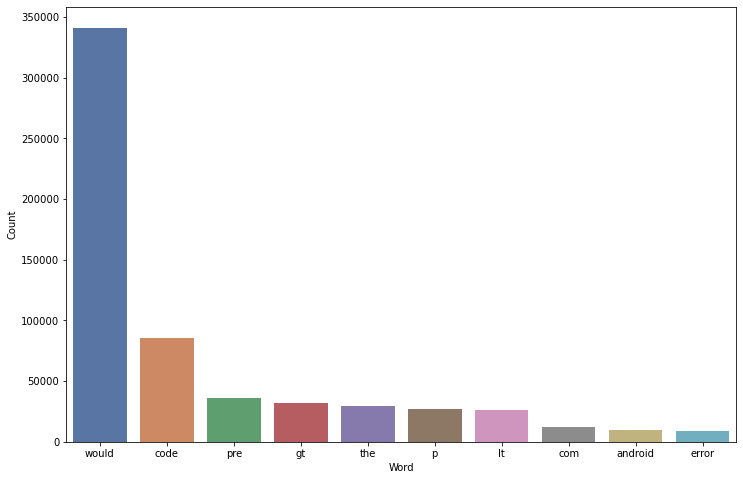

In [16]:
counter(train[train['Y'] == "HQ"], 'description', 10)

 ### Categoría LQ_EDIT

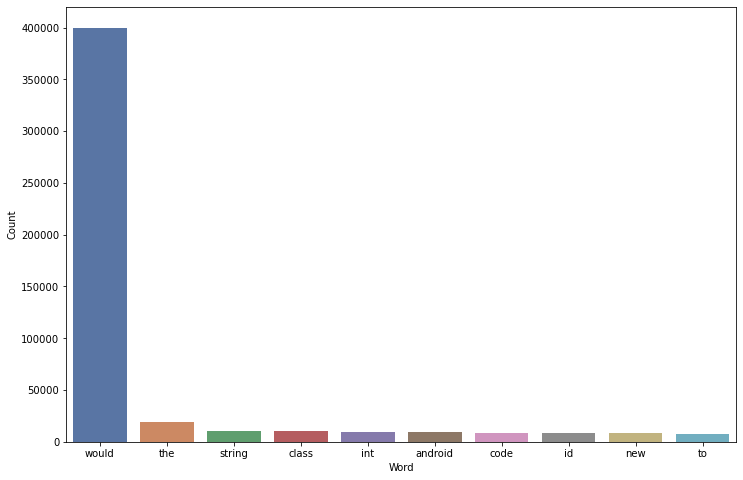

In [17]:
counter(train[train['Y'] == "LQ_EDIT"], 'description', 10)

Luego de la limpieza notamos que por lejos la palabra más utilizada es would, esperable siendo que la mayoría de los post son de consultas.

## Largo promedio de palabra en cada post

Text(0.5, 0.98, 'Average word length in each question')

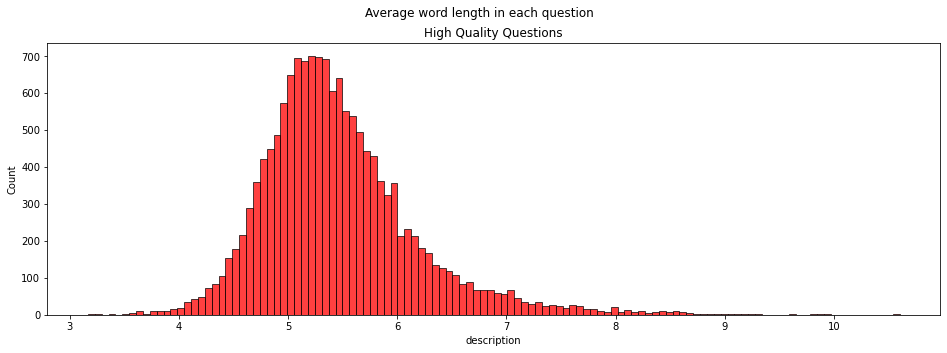

In [18]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'HQ']['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
fig.suptitle('Average word length in each question')

Text(0.5, 0.98, 'Average word length in each question')

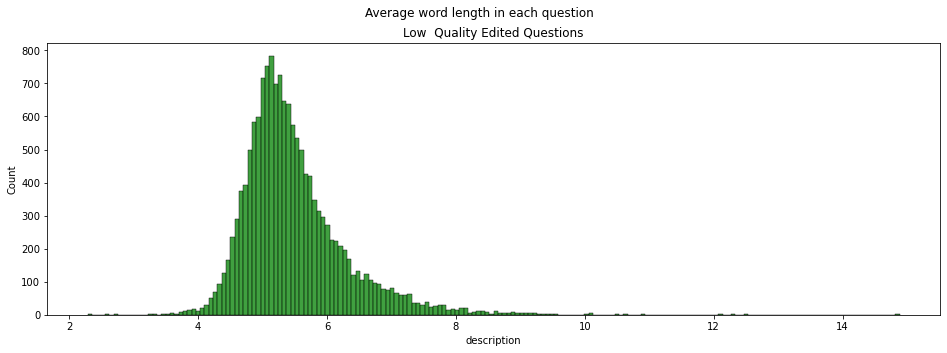

In [19]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[(train['Y'] == 'LQ_EDIT') ]['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'green')
ax1.set_title('Low  Quality Edited Questions')
fig.suptitle('Average word length in each question')

Text(0.5, 0.98, 'Average word length in each question')

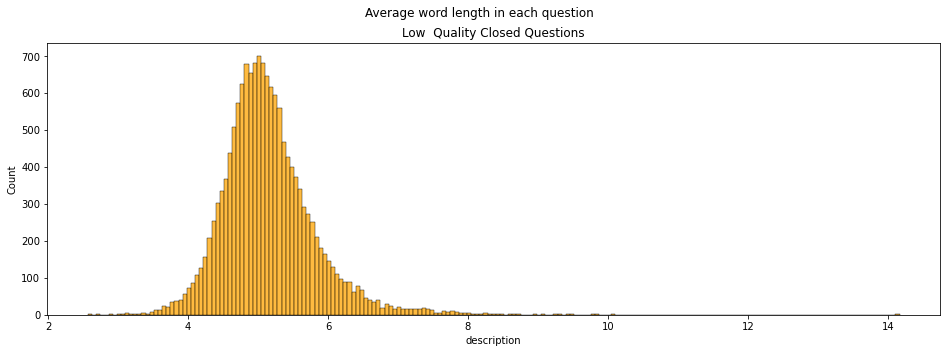

In [20]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[(train['Y'] == 'LQ_CLOSE')]['description'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax  =  ax1, color = 'orange')
ax1.set_title('Low  Quality Closed Questions')
fig.suptitle('Average word length in each question')

## Largo promedio de cada post

Text(0.5, 0.98, 'Average length in each question')

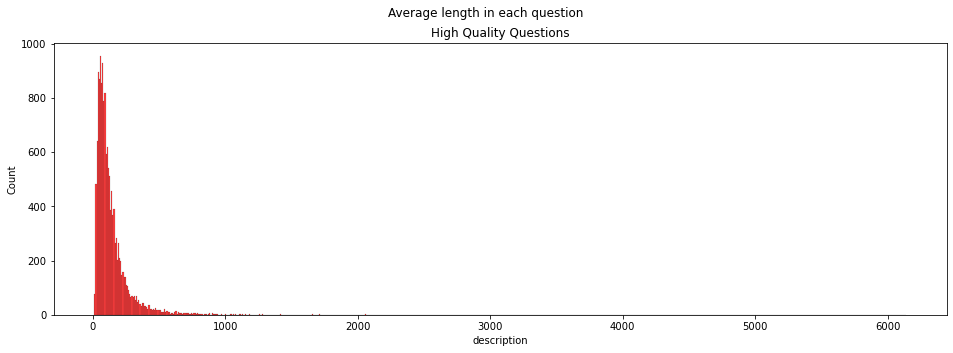

In [21]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'HQ']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'red')
ax1.set_title('High Quality Questions')
fig.suptitle('Average length in each question')

Text(0.5, 0.98, 'Average length in each question')

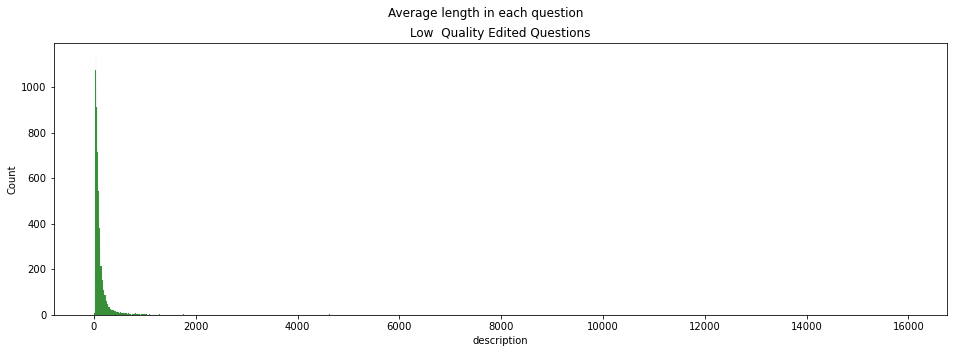

In [22]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'LQ_EDIT']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'green')
ax1.set_title('Low  Quality Edited Questions')
fig.suptitle('Average length in each question')

Text(0.5, 0.98, 'Average length in each question')

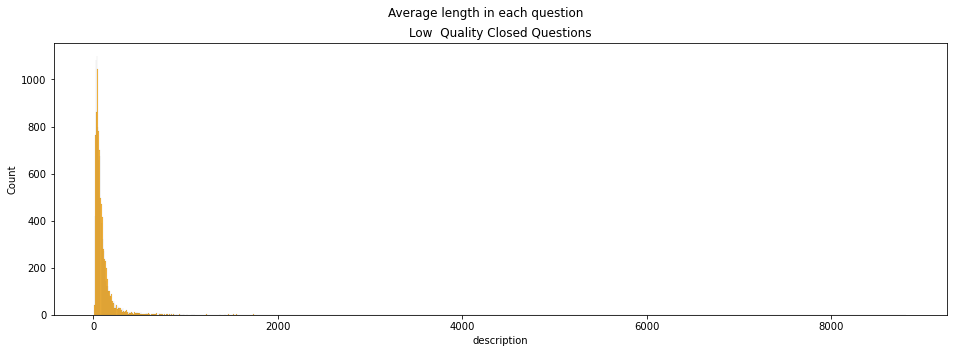

In [23]:
fig,(ax1) = plt.subplots(1, 1, figsize = (16, 5))
word  =  train[train['Y'] == 'LQ_CLOSE']['description'].str.split().apply(len)
sns.histplot(word,ax  =  ax1, color = 'orange')
ax1.set_title('Low  Quality Closed Questions')
fig.suptitle('Average length in each question')

Para los dos casos, las distribuciones no difieren enormemente entre las distintas categorías. Lo que si se debe notar es que al analizar el largo de los post, existen algunos de cercanos 16000 palabras, que aunque no se vean en el gráfico claramente, los límites del gráfico indican la existencia de un valor en el rango mostrado.

# 4) Hacer una propuesta para abordar el problema

### a. Por ejemplo, cuál será la plataforma/librería a utilizar

Se utilizará la librería Tensorflow y Keras para realizar la tokenización y entrenamiento. De ser necesario una mejora se utilizará la librería Transformers de [Hugging Face](https://huggingface.co/transformers/).

### b. “Se va a utilizar una arquitectura con L capas (hacer un diagrama)…”

Se utilizará una estructura del tipo LSTM, con lstm_out unidades, se utilizarán distintos valores y se irá evaluando su cambio. Embed_dim se seleccionará según los recursos del computador y se probarán valores al entrenar el modelo.

embed_dim = ???

lstm_out = ???

* model = Sequential()
* model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
* model.add(SpatialDropout1D(0.4))
* model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
* model.add(Dense(3,activation='softmax'))
* model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])


### c. Enunciar algún plan B o cambio en la arquitectura en caso de que la propuesta inicial no funcione

El plan B será utilizar Transformers, junto al Tokenizador BERT, todo incluido en la librería Transformers.